In [17]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("Cleaned.csv")

In [3]:
df.describe()

,index,Id,Age,Gender,Height,Weight,Systolic,Diastolic,Cholesterol,Glucose,Smoking,Alchohol,Active,Cardio,Height in Meters,BMI
count,66174.000000,66174.000000,66174.000000,66174.000000,66174.000000,66174.000000,66174.000000,66174.000000,66174.000000,66174.000000,66174.00000,66174.000000,66174.000000,66174.000000,66174.000000,66174.000000
mean,33088.483150,49211.213845,53.327092,1.357089,164.345423,74.585491,129.306646,97.595098,1.386013,1.238145,0.09274,0.056699,0.797534,0.513706,1.643454,27.705781
std,19104.648361,28896.546354,6.803825,0.479145,8.353542,14.605570,158.380086,193.757850,0.692238,0.584121,0.29007,0.231268,0.401841,0.499816,0.083535,6.199233
min,0.000000,0.000000,30.000000,1.000000,55.000000,28.000000,-150.000000,-70.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.550000,9.917581
25%,16543.250000,24058.250000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,1.590000,23.875433
50%,33089.500000,48929.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.650000,26.573129
75%,49632.750000,74057.750000,58.000000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.700000,30.470522
max,66178.000000,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.00000,1.000000,1.000000,1.000000,2.500000,298.666667


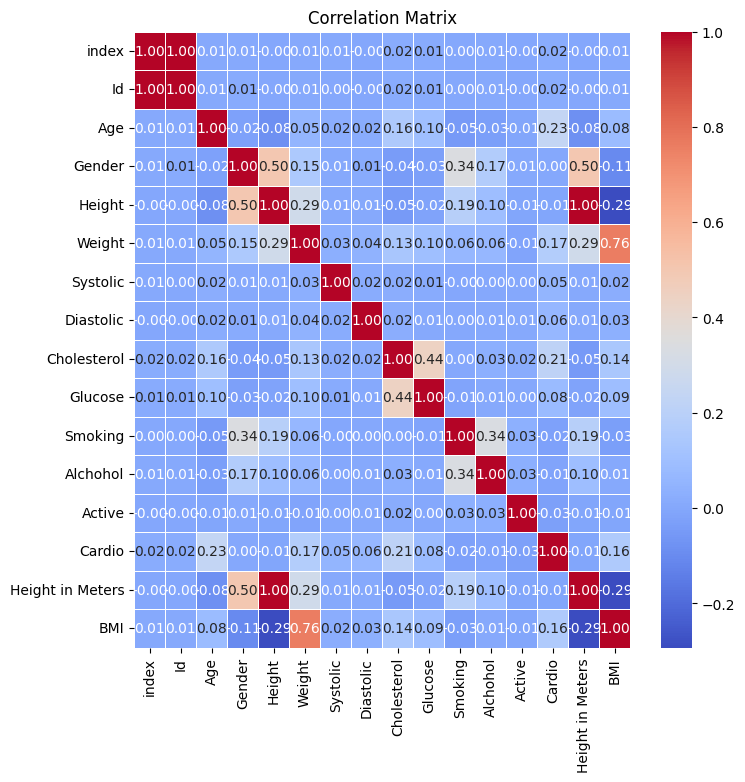

In [4]:
## to create and visualize my correlation matrix for heatmap using seaborn and matplot lib

correlation_matrix = df.corr()
plt.figure(figsize=(8, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [5]:
df_ = df[["Age", "Gender", "Height", "Weight",
                  "BMI"]]
df_

,Age,Gender,Height,Weight,BMI
0,50,2,168,62.0,21.967120
1,55,1,156,85.0,34.927679
2,52,1,165,64.0,23.507805
3,48,2,169,82.0,28.710479
4,48,1,156,56.0,23.011177
...,...,...,...,...,...
66169,53,2,168,76.0,26.927438
66170,62,1,158,126.0,50.472681
66171,52,2,183,105.0,31.353579
66172,61,1,163,72.0,27.099251


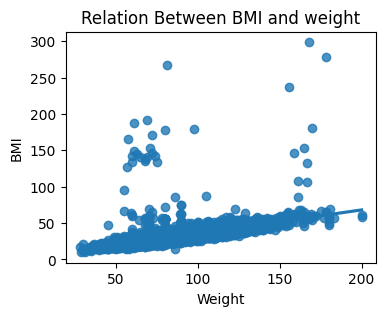

In [29]:
plt.figure(figsize=(4, 3))

sns.regplot(x = "Weight", y="BMI", data=df_)

plt.title("Relation Between BMI and weight")
plt.show()

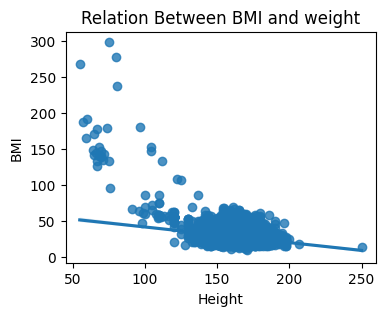

In [30]:
plt.figure(figsize=(4, 3))

sns.regplot(x = "Height", y="BMI", data=df_)

plt.title("Relation Between BMI and weight")
plt.show()

outliers are messing with my data

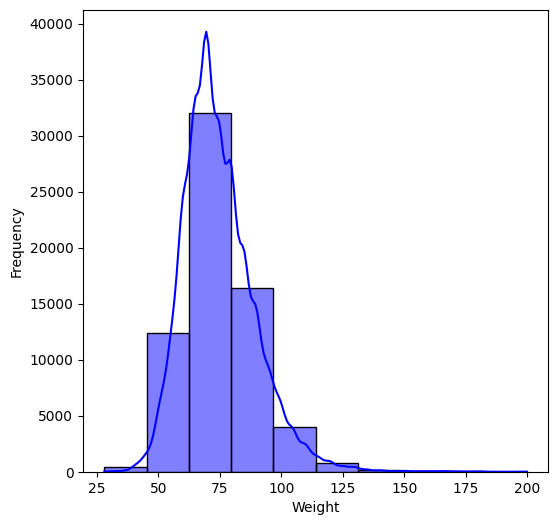

In [7]:
plt.figure(figsize=(6,6))
sns.histplot(data=df_, x="Weight", bins=10, kde=True, color='blue')
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()

In [8]:
n_df = df_[df_["Weight"] <= 150]

In [9]:
n_df = n_df[n_df["Height"] <= 200]

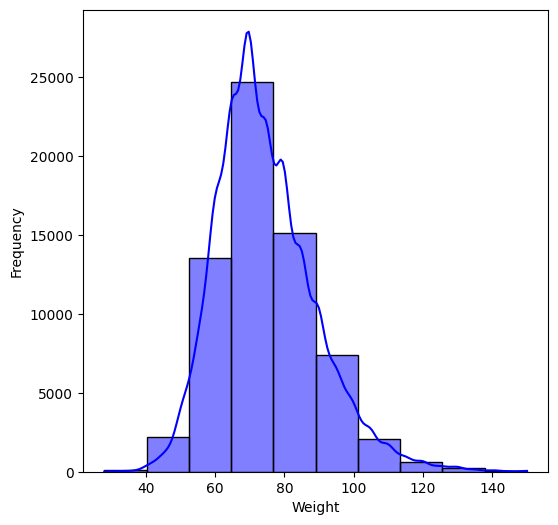

In [10]:
plt.figure(figsize=(6,6))
sns.histplot(data=n_df, x="Weight", bins=10, kde=True, color='blue')
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()

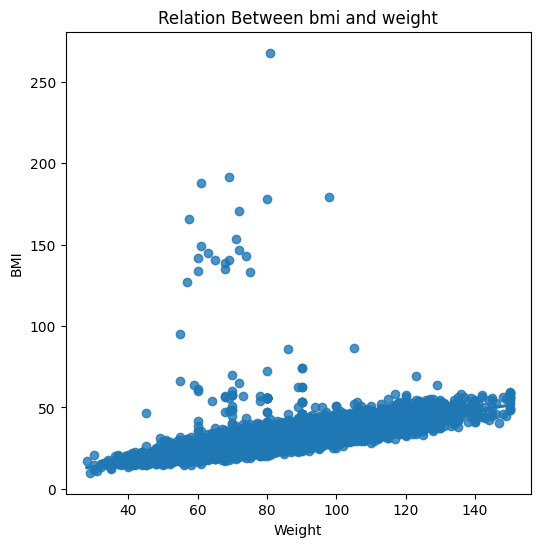

In [28]:
plt.figure(figsize=(6, 6))

sns.regplot(x = "Weight", y="BMI", data=n_df)

plt.title("Relation Between bmi and weight")
plt.show()

In [12]:
n_df.describe()

,Age,Gender,Height,Weight,BMI
count,66113.000000,66113.00000,66113.000000,66113.000000,66113.000000
mean,53.328498,1.35704,164.348010,74.503415,27.662012
std,6.803283,0.47913,8.306109,14.349326,5.815917
min,30.000000,1.00000,55.000000,28.000000,9.917581
25%,48.000000,1.00000,159.000000,65.000000,23.875433
50%,54.000000,1.00000,165.000000,72.000000,26.573129
75%,58.000000,2.00000,170.000000,83.000000,30.468750
max,65.000000,2.00000,200.000000,150.000000,267.768595


<function matplotlib.pyplot.show(close=None, block=None)>

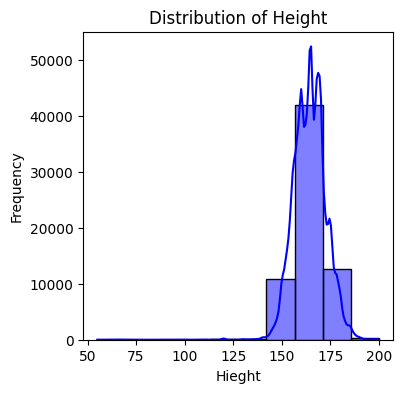

In [13]:
plt.figure(figsize=(4, 4))

sns.histplot(data=n_df, x="Height", bins=10, color='blue', kde=True)

plt.title("Distribution of Height")
plt.xlabel("Hieght")
plt.ylabel("Frequency")
plt.show

In [14]:
## creating a train and testing data set 

msk = np.random.rand(len(n_df)) < 0.8
train = n_df[msk]
test = n_df[~msk]

In [15]:
# creating the Linear Regression object 
lm = LinearRegression()

train_x = train["Weight"].array.reshape(-1, 1)
train_y = train["BMI"].array.reshape(-1, 1)

# to fit our model 
lm.fit(train_x, train_y)

# the coefficients 
print("Coefficients:", lm.coef_)
print("Intercept", lm.intercept_)

Coefficients: [[0.31390626]]
Intercept [4.27872368]


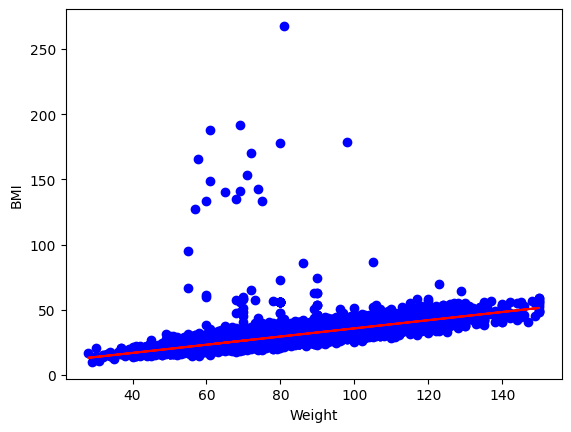

In [16]:
# To plot the line over the data 
plt.scatter(train.Weight, train.BMI, color='blue')
plt.plot(train_x, lm.coef_[0][0]*train_x + lm.intercept_[0], 'r')
plt.xlabel("Weight")
plt.ylabel("BMI")
plt.show()

In [18]:
## using MSE to evaluate the accuracy of this model 
test_x = test["Weight"].array.reshape(-1, 1)
test_y = test["BMI"].array.reshape(-1, 1)
test_y_ = lm.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 2.14
Residual sum of squares (MSE): 12.38
R2-score: 0.62


In [22]:
data = np.array([111])
data = data.reshape(-1, 1)
new_d = lm.predict(data)
print(new_d)

[[39.12231908]]


In [31]:
bmi = 111/(1.78 * 1.78)
bmi

35.03345537179649